In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('C:\\Users\\M4\\Desktop\\KAG_energydata_complete.csv',parse_dates=['date'], index_col= 'date')

In [3]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [4]:
data = df.resample('D').sum() 

In [5]:
df = df.resample('D').mean()
df.shape

(138, 28)

In [6]:
def train_test_split(df):
    
    # compute split point
    end_idx = df.shape[0]* 70 // 100
    
    train_data = df.iloc[1:end_idx, : ]
    test_data = df.iloc[end_idx:, :]
    
    return train_data, test_data

# Split the data into train and test
X_train, X_test = train_test_split(df)

In [7]:
X_test.shape , X_train.shape


((42, 28), (95, 28))

In [8]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(train, test):
    scaler = MinMaxScaler().fit(train)
    return scaler.transform(train), scaler.transform(test), scaler

In [9]:
X_train, X_test, scaler = scale_data(X_train, X_test)

In [10]:
def multivariate_splitter(df):

    input_features = []
    ouput_feature = []
    
    len_df = df.shape[0]
    
    for i in range(len_df):
        
        end_idx = i + 15
        
        if end_idx > len_df-15:
            break
            
        input_x , output_y = df[i:end_idx, 1:], df[end_idx: end_idx+15, 0]
        
        input_features.append(input_x)
        ouput_feature.append(output_y)
    
    return np.array(input_features), np.array(ouput_feature)

In [11]:
X_train, Y_train = multivariate_splitter(X_train)
X_test, Y_test = multivariate_splitter(X_test)

In [12]:
print('Shape of (training data) input features : %s and ouput feature %s' % (X_train.shape, Y_train.shape))
print('Shape of (testing data) input features : %s and ouput feature %s' % (X_test.shape, Y_test.shape))

Shape of (training data) input features : (66, 15, 27) and ouput feature (66, 15)
Shape of (testing data) input features : (13, 15, 27) and ouput feature (13, 15)


In [33]:
import tensorflow as tf
from Energy_Models.LstNet import LSTNetModel
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = LSTNetModel((15,15,27))

In [34]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 15, 27)]     0           []                               
                                                                                                  
 reshape_4 (Reshape)            (None, 1, 15, 27)    0           ['input_3[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 1, 15, 27)    2943        ['reshape_4[0][0]']              
                                                                                                  
 dropout_4 (Dropout)            (None, 1, 15, 27)    0           ['conv2d_2[0][0]']               
                                                                                            

In [35]:
model.compile(optimizer='adam', loss ='mse')
history = model.fit(X_train , Y_train, epochs=200, batch_size=64, verbose= 1,validation_split=0.3,callbacks=callback)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0467 - val_loss: 0.0661
Epoch 2/200
1/1 [==============================] - 0s 37ms/step - loss: 0.0416 - val_loss: 0.0657
Epoch 3/200
1/1 [==============================] - 0s 39ms/step - loss: 0.0388 - val_loss: 0.0657
Epoch 4/200
1/1 [==============================] - 0s 42ms/step - loss: 0.0375 - val_loss: 0.0651
Epoch 5/200
1/1 [==============================] - 0s 42ms/step - loss: 0.0367 - val_loss: 0.0644
Epoch 6/200
1/1 [==============================] - 0s 55ms/step - loss: 0.0368 - val_loss: 0.0638
Epoch 7/200
1/1 [==============================] - 0s 38ms/step - loss: 0.0360 - val_loss: 0.0632
Epoch 8/200
1/1 [==============================] - 0s 39ms/step - loss: 0.0356 - val_loss: 0.0628
Epoch 9/200
1/1 [==============================] - 0s 38ms/step - loss: 0.0350 - val_loss: 0.0624
Epoch 10/200
1/1 [==============================] - 0s 38ms/step - loss: 0.0344 - val_loss: 0.0621
Epoch 11/200
1/1 [===

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))
def root_mean_squared_log_error(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: # check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5
def print_metrics():
    print('Train   RMSE  value   : %.3f ' % root_mean_squared_error(Y_train, model.predict(X_train)))
    print('Train   MSE   value   : %.3f ' % mean_squared_error(Y_train, model.predict(X_train)))
    print('Train   R2    value   : %.3f ' % r2_score(Y_train,model.predict(X_train)))
    print('Train   MAPE  value   : %.3f ' % mean_absolute_percentage_error(Y_train, model.predict(X_train)))
    print('Train   MAE   value   : %.3f ' % mean_absolute_error(Y_train, model.predict(X_train)))
    print('---------------------------------------------')
    print('Test    RMSE  value   : %.3f ' % root_mean_squared_error(Y_test, model.predict(X_test)))
    print('Test    MSE   value   : %.3f ' % mean_squared_error(Y_test, model.predict(X_test)))
    print('Test    R2    value   : %.3f ' % r2_score(Y_test, model.predict(X_test)))
    print('Test    MAPE  value   : %.3f ' % mean_absolute_percentage_error(Y_test, model.predict(X_test)))
    print('Test    MAE   value   : %.3f ' % mean_absolute_error(Y_test, model.predict(X_test)))

In [37]:
print_metrics()

3/3 [==============================] - 0s 3ms/step
Train   RMSE  value   : 0.197 
3/3 [==============================] - 0s 3ms/step
Train   MSE   value   : 0.039 
3/3 [==============================] - 0s 5ms/step
Train   R2    value   : 0.007 
3/3 [==============================] - 0s 7ms/step
Train   MAPE  value   : 3743482242596.677 
3/3 [==============================] - 0s 4ms/step
Train   MAE   value   : 0.147 
---------------------------------------------
1/1 [==============================] - 0s 25ms/step
Test    RMSE  value   : 0.198 
1/1 [==============================] - 0s 23ms/step
Test    MSE   value   : 0.039 
1/1 [==============================] - 0s 22ms/step
Test    R2    value   : -0.074 
1/1 [==============================] - 0s 24ms/step
Test    MAPE  value   : 0.430 
1/1 [==============================] - 0s 27ms/step
Test    MAE   value   : 0.145 


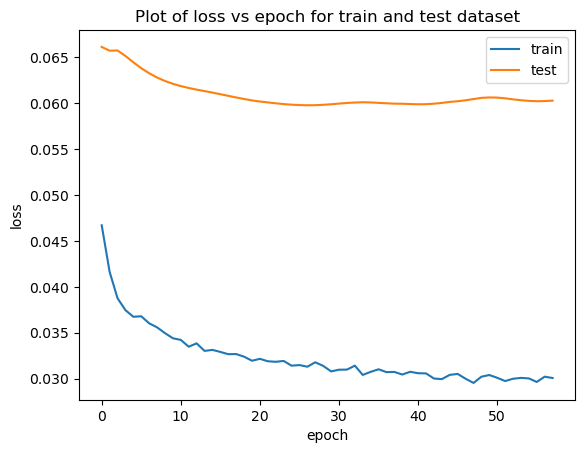

In [38]:
# Plot of loss vs epoch for train and test dataset
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()